# Recursion examples

adopted from: https://github.com/rasbt/algorithms_in_ipython_notebooks

https://github.com/AbhishekSinhaCoder/Data-Structures-Concepts-through-Notebook

# Examples using Recursion

**Important Note**

For most cases, using function recursion should be avoided in Python are better be implemented using for/while loops most of the time (although, I must admit that recursive solutions do look elegant). One of the reasons is that stacking recursive calls can easily blow up memory or at least result in the popular yet nasty "RuntimeError: maximum recursion depth exceeded". Also, keep in mind that Python does not optimize tail recursion in favor of having the full tracebacks for debugging; related to that, please see Guido van Rossums blog posts "[Tail Recursion Elimination](http://neopythonic.blogspot.com.au/2009/04/tail-recursion-elimination.html)" and "[Final Words on Tail Calls](http://neopythonic.blogspot.com.au/2009/04/final-words-on-tail-calls.html)." If you do like to play around with recursion more efficiently, I highly recommend taking a look at [Haskell](https://www.haskell.org) or other functional programming languages. That being said, below are some examples of recursive function implementations in Python for illustrative purposes.

In [2]:
# Let's pretend we are not aware of Python's x**n or math.pow(x, n)
6**3

216

In [3]:
import math
math.pow(6,3)

216.0

## Review: Running time and big-$\mathcal{O}$: Recursive Algorithms for Computing Powers

As example of the use of linear recursion, we consider the problem of raising a number $x$ to an arbitrary nonnegative integer, $n$. That is, we wish to compute the power function, defined as $power(x,n) = xn$. (We use the name “power” for this discussion, to differentiate from the built-in Python function _pow_ that provides such functionality.) We will consider two different recursive formulations for the problem that lead to algorithms with very different performance.
A trivial recursive definition follows from the fact that $x^n = x \cdot x^{n−1}$ for $n > 0$.


\begin{equation}
power(x,n) ==\left\{
                \begin{array}{ll}
                        1 \ if \ n = 0\\
                        x \ power(x, n − 1) \ otherwise.
                \end{array}
              \right.
\end{equation}

This definition leads to a recursive algorithm shown below:

In [ ]:
# in case we did not know about Pythons x**n statement :)

In [ ]:
2**8

256

In [ ]:
# so the idea is to reduce the problem to a simpler instance of the same problem
## to start with we need a base case
## so base case for power would be x to 0 which is 1

In [ ]:
2**0

1

In [1]:
def basicpower(x, n):
    '''Compute the value x**n for integer n.'''
    if n == 0:
        return 1 # base case without base case our recursive function will run forever
    else:
        return x  * basicpower(x, n-1) # our recursive call so we are calling the function on itself on a smaller problem space

In [5]:
basicpower(2,10)

1024

# How to make a recursive function in two easy steps
* figure out the base case
* figure out how to reduce problem to a subset of the same problem

In [6]:
basicpower(2,8)

256

A recursive call to this version of power(x,n) runs in $\mathcal{O}(n)$ time.

In [7]:
%%timeit
basicpower(2,1000)

295 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
# https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it
import sys
print(sys.getrecursionlimit())

1000


In [3]:
sys.setrecursionlimit(9000)

In [9]:
%%timeit
basicpower(2,2000)

640 µs ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
pow(2,2000)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
5.35 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
basicpower(2,4000)

1318204093430943100103889794236591363184019161093272769092803450241756928112834455107975212317212203314094075648071682303844681769424058128173106245251218403854467444438688895632897064277199393003658655292424951448883218338941583237562000928492260894611103857875407791326544091858312558605043164728460363649082385000782681167246890021068910448808948534719215270882011976500612594485839776187466930127874523350479658699451405443521705380373270324028340081592616934836479947271609457689400724316866256888660306583248683060612501764335646973240725287456721773369482423667532334175568183922195469382045607202025388437122682684485863619421287513956658744539006801474797581397174811477043924882668866712923795412855584187446066572963049265860017933827257911002088122876736120060347897312016889399757435372765399896922309279825570166606797269890623692162876477283791552608646438916157053461695670374484050297527909408758729896842351653162609089838935144902005685122107904896671887894330923207197857563987720

In [ ]:
%%timeit
basicpower(2,4000)

1.57 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
basicpower(2,8000)

4.33 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# if we set recursion limit to 9000 we do not get to run it 9000 times in Python
# so 8961 but 8962 does not
# same overhead of "unused" recursion calls exists on other recursion limits
# TODO write a paper on where this 38 call overhead comes in in Python
# I will give at least 1 point in the class for this!
basicpower(2,8962)


RecursionError: ignored

In [ ]:
# not satisfied with performance of our basic power we have an improvement in mind

In [4]:

def power(x, n):
    '''Compute the value x**n for integer n.'''
    if n == 0: # this is our base case
        return 1
    else:
        partial = power(x, n // 2) # remember that x^4*x^4 == x^8
        result = partial * partial # we assume this is constant difficulty
    if n % 2 == 1: # in case n is odd
        result *= x
    return result

In [13]:
power(2,8)

256

In [14]:
power(2,9)

512

In [1]:
# will not be correct but let's see
# power(3, -10) loops because
-1 // 2

-1

In [5]:
import math


In [4]:
math.log2(1024)  # because pow(2,10) == 1024

10.0

In [ ]:
1024*1024 # so 1MB

1048576

In [ ]:
math.log2(1024*1024) # so for 1 million we will only need

20.0

In [ ]:
math.log2(10**100) # log n of googool more than atoms in the universe
# https://en.wikipedia.org/wiki/Googol

332.19280948873626

In [ ]:
# so if we were playing the guess the number with yes and no questions we could figure out any number up to googool in 333 questions

# not bad when we consider that number of atoms in Universe is something 10**80

In [6]:
%%timeit
power(2,1000)

2.95 µs ± 842 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%%timeit
power(2,2000)

3.62 µs ± 720 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%%timeit
2**2000

1.93 µs ± 367 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
power(2,4000)

7.36 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
power(2,8000)

19.6 µs ± 5.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
2**8000

18.3 µs ± 6.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
math.pow(2,1000) # math.pow can not work with huge floating numbers

337 ns ± 6.53 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
power(2,2_000_000)

8.29 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


To analyze the running time of the revised algorithm, we observe that the exponent in each recursive call of function power(x,n) is at most half of the preceding exponent. As we saw with the analysis of binary search, the number of times that we can divide $n$ in half before getting to one or less is $\mathcal{O}(log n)$. Therefore, our new formulation of the power function results in $\mathcal{O}(logn)$ recursive calls. Each individual activation of the function uses $\mathcal{O}(1)$ operations (excluding the recursive calls), and so the total number of operations for computing power(x,n) is O(logn). This is a significant improvement over the original $\mathcal{O}(n)$-time algorithm.

**Exercise:** Test the two functions with a timer and see the difference. Identify the base case and stopping conditions.

In [ ]:
# so we got the famous stack overflow
# technically we could adjust the recursion depth in Python but it would not really help in the long run

In [9]:
%%timeit
power(2,100_000)

337 µs ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
2**100_000

490 µs ± 93.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
power(2,1_000_000)

In [ ]:
%%timeit
2**1_000_000

# We humans operate better on visual data - 1 picture and 1000 words

In [11]:
# in python we can pass functions as arguments
import matplotlib.pyplot as plt # very popular visualizaiton library
import time
def automatic_time(input_array, func_name):
    # input_array contains all elements of input,
    #   preferably sorted from small to big,
    #   each element could also be a tuple, which is requried
    #   for functions that need more than 1 input
    # func_name is the name of the function (as object, not str)
    # this function also suppresses printing output from the {func_name}
    ret = []
    for val in input_array:
#         print(time.process_time_ns())
#         start = time.process_time()
        start = time.time()
        from IPython.utils import io as iuio
        with iuio.capture_output() as suppressed:
            if isinstance(val, tuple):
                _ = func_name(*val) #unrolling the tuple to pass multiple arguments to our function
            else:
                _ = func_name(val) # just a single argument function

        ret.append((time.time() - start)) # 10e9 converts unit from second to nanosecond
    return ret

# my_input_arr = [(2,1_000),(2,2_000)]
# print("testing function_1 with the automatic measure")
# print(F"run-time for function 1 result in nanoseconds: \n{automatic_time(my_input_arr, basicpower)}")

In [12]:
# create some inputs
input_arr = [(2,i) for i in range(100, 2_500, 100)]
input_arr

[(2, 100),
 (2, 200),
 (2, 300),
 (2, 400),
 (2, 500),
 (2, 600),
 (2, 700),
 (2, 800),
 (2, 900),
 (2, 1000),
 (2, 1100),
 (2, 1200),
 (2, 1300),
 (2, 1400),
 (2, 1500),
 (2, 1600),
 (2, 1700),
 (2, 1800),
 (2, 1900),
 (2, 2000),
 (2, 2100),
 (2, 2200),
 (2, 2300),
 (2, 2400)]

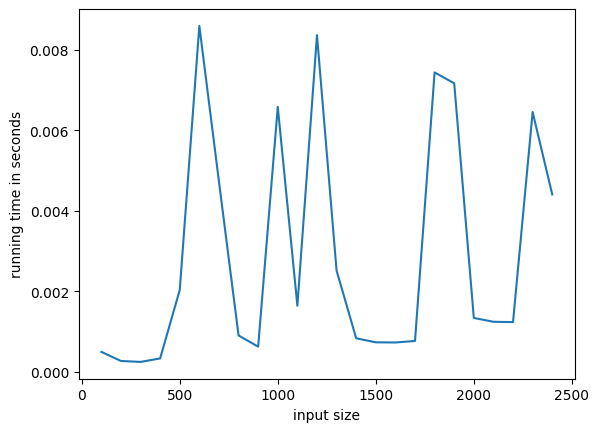

In [13]:


# input_arr_t = [(i,i) for i in range(1, 1000)]

# fun1 = automatic_time(input_arr, function_1)
results = automatic_time(input_arr, basicpower)
# fun3 = automatic_time(input_arr, function_3)
# fun4 = automatic_time(input_arr_t, function_4)
# fun5 = automatic_time(input_arr_t, function_5)

plt.plot([el[1] for el in input_arr], results) # we only want to see the i as x
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show() # again we only run each call once so our results are not quite representative
# we might see peaks

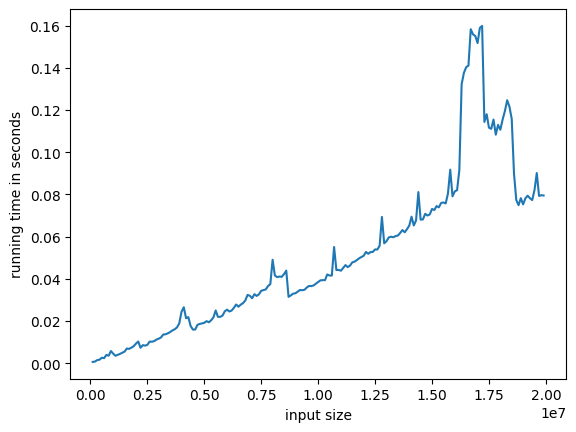

In [15]:
input_arr = [(2,i) for i in range(100_000, 20_000_000, 100_000)]

results = automatic_time(input_arr, power)
# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

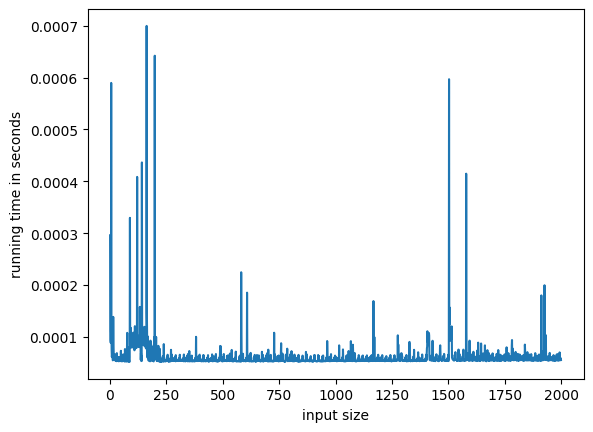

In [17]:
input_arr = [(2,i) for i in range(1, 2000)]

results = automatic_time(input_arr, power)
# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [16]:
lin_numbers = list(range(1,200))
log_numbers = [math.log2(n) for n in lin_numbers]
log_numbers[:5]

[0.0, 1.0, 1.584962500721156, 2.0, 2.321928094887362]

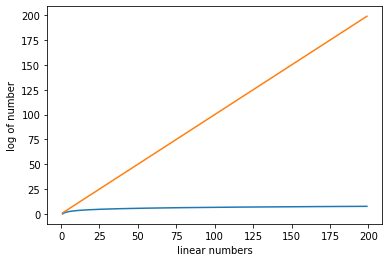

In [ ]:
plt.plot(lin_numbers, log_numbers)
plt.plot(lin_numbers, lin_numbers)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("linear numbers")
plt.ylabel("log of number")
plt.show() # we can clearly see that logn will increase much slower than simple n

In [ ]:
math.pow(2,800_000)

# so it certainly looks linear but the jumps in our speed indicates how OS and computer hardware might affect an algorithm in real life

## TODO on Power function

* Implement power function that supports negative powers
* Implement option for visualization that supports running multiple runs for each value and then takes average for each run.


## Factorial

In [ ]:
# so again base case for stopping will be 1

In [18]:
def factorial(x):
    if x <= 1:
        return 1 # not x! as factorial of 0 is considered 1!
    # we could do something else here
    return x * factorial(x-1) # so we want to be sure that our problem space keeps getting smaller

In [19]:
math.factorial(0) # there is a built in solution already for our base case

1

In [22]:
# regular loop based algorithm should need less memory
def factorial_loop_down(x):
    res = 1
    while x > 1: # so we start at the end - bottom down
        res *= x
        x -=1
    return res

In [23]:
# regular loop based algorithm should need less memory
def factorial_loop_up(x):
    res = 1
    for i in range(1,x+1): # so bottom-up
        res *= i
    return res

In [25]:
factorial_loop_up(5), factorial_loop_down(5)

(120, 120)

In [26]:
factorial(5)

120

In [27]:
math.factorial(5)

120

In [ ]:
factorial(1)

5! = 5 x 4 x 3 x 2 x 1 = 120

In [28]:
factorial(10)

3628800

In [29]:
%%timeit
factorial(10)

736 ns ± 6.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
%%timeit
factorial(100)

24.6 µs ± 905 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
%%timeit
factorial_loop_up(100)

6.46 µs ± 702 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
%%timeit
factorial_loop_down(100)

7.77 µs ± 55.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%%timeit
math.factorial(100)

1.16 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
%%timeit
factorial(1000)

473 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%%timeit
factorial_loop_up(1000)

237 µs ± 6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
%%timeit
factorial_loop_down(1000)

284 µs ± 9.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%%timeit
math.factorial(1000)

40.2 µs ± 892 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
factorial(2000)

1.63 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
factorial_loop(1000)

324 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
factorial_loop(2000)

1.25 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
math.factorial(2000)

162 µs ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
factorial(5000)

In [ ]:
%%timeit
factorial(5000) #

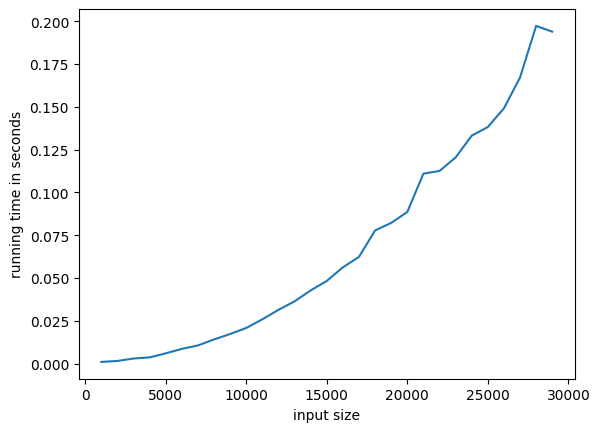

In [38]:
input_arr = [i for i in range(1_000, 30_000, 1_000)]

fun2 = automatic_time(input_arr, factorial_loop_up)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

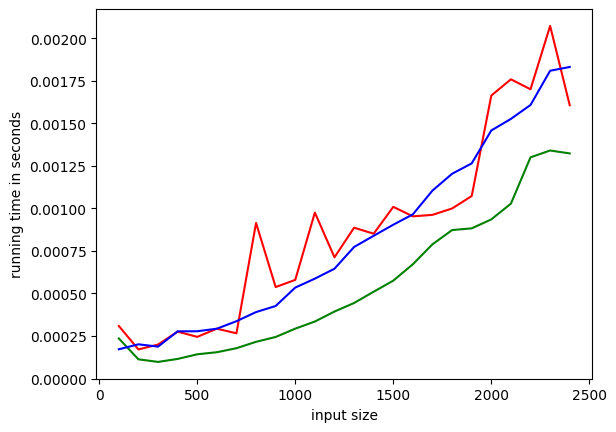

In [42]:
input_arr = [i for i in range(100, 2_500, 100)]

fun3 = automatic_time(input_arr, factorial_loop_down)
plt.plot(input_arr, fun3, color="red")
fun2 = automatic_time(input_arr, factorial_loop_up)
plt.plot(input_arr, fun2, color="green")
fun1 = automatic_time(input_arr, factorial)
plt.plot(input_arr, fun1, color="blue")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()
# the peaks are from the fact that we run the experiment only once
# and our virtual CPU has better things to do at times...

# Exercise: Fibonacci

The sequence, in which each number is the sum of the two preceding numbers is known as the Fibonacci sequence: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, \cdots$ (each number is the sum of the previous two, e.g., $144=55 + 89$).

You probably have seen Fibonacci before, this should be familiar. The twist is we are going to look at a variety of ways of implementing it and the complexity of execution for each.

A direct implementation of the description above would lead to pseudo code like this:

In [43]:
def bad_fibonacci(n):
  """Return the nth Fibonacci number."""
  if n <= 1:
    return n
  return bad_fibonacci(n-2) + bad_fibonacci(n-1)

In [44]:
for n in range(10):
    print(bad_fibonacci(n))

0
1
1
2
3
5
8
13
21
34


In [45]:
%%timeit
bad_fibonacci(10)

12.6 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
%%timeit
bad_fibonacci(12)

29.7 µs ± 777 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
%%timeit
bad_fibonacci(16)

208 µs ± 7.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%%timeit
bad_fibonacci(20)

1.47 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
%%timeit
bad_fibonacci(24)

11.2 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%%timeit
bad_fibonacci(32)

643 ms ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


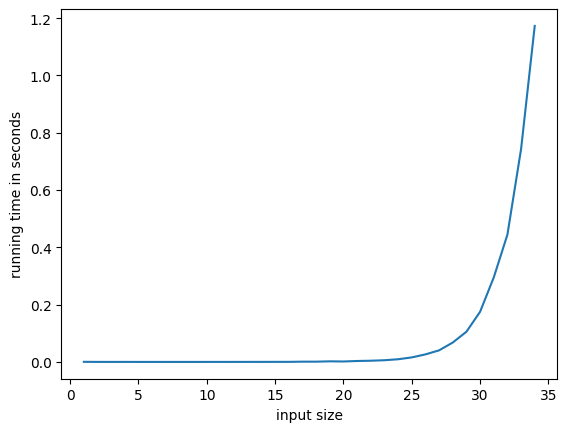

In [51]:
input_arr = [i for i in range(1, 35, 1)]

fun2 = automatic_time(input_arr, bad_fibonacci)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
# so bad_fibonacci looks like an exponentional complexity

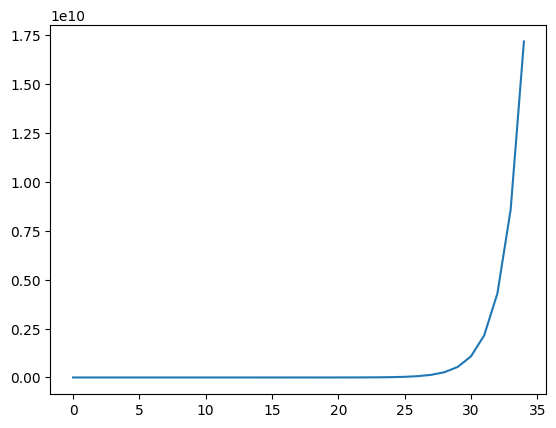

In [52]:
arr = [2**n for n in range(35)]
plt.plot(list(range(35)), arr)
plt.show()

In [ ]:
# sure smells like exponential

In [ ]:
# what is so bad about bad fibonacci ?
# so for each recursive call you get new 2 recursive calls
# it is like that story of inventor of chess in India
# he asked for 1 grain of rice on first square
# 2 on 2nd , 4 on 3rd, 8 on 4th,
# the story modification is that king realized the problem
# to get out of it king said ok, you have to count the rice


In [53]:
2**32 # he could count half a board

4294967296

In [54]:
2**64 # not likely for a human...

18446744073709551616

In [55]:


def good_fibonacci(n):
  """Return pair of Fibonacci numbers, F(n) and F(n-1)."""
  if n <= 1:
    return (n,0)
  else:
    (a, b) = good_fibonacci(n-1) # looks linear here
    return (a+b, a) # we return a tuple (two heterogenous values)

In [56]:
%%timeit
good_fibonacci(10)

1.7 µs ± 397 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
%%timeit
good_fibonacci(20)

2.29 µs ± 77.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
%%timeit
good_fibonacci(30)

3.41 µs ± 87.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


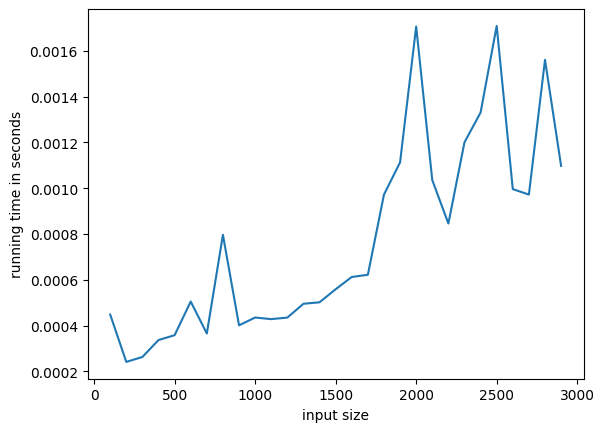

In [59]:
input_arr = [i for i in range(100, 3_000, 100)]

fun2 = automatic_time(input_arr, good_fibonacci)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
import sys
print(sys.getrecursionlimit())

In [ ]:
#https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it
sys.setrecursionlimit(100_000)
print(sys.getrecursionlimit())

In [ ]:
good_fibonacci(5_000)

(387896845438832563370191630832590531208212771464624510616059721489555013904403709701082291646221066947929345285888297381348310200895498294036143015691147893836421656394410691021450563413370655865623825465670071252592990385493381392883637834751890876297071203333705292310769300851809384980180384781399674888176555465378829164426891298038461377896902150229308247566634622492307188332480328037503913035290330450584270114763524227021093463769910400671417488329842289149127310405432875329804427367682297724498774987455569190770388063704683279481135897373999311010621930814901857081539785437919530561751076105307568878376603366735544525884488624161921055345749367589784902798823435102359984466393485325641195222185956306047536464547076033090242080638258492915645287629157575914234380914230291749108898415520985443248659407979357131684169286803954530954538869811466508206686289742063932343848846524098874239587380197699382031717420893226546887936400263079778005875912967138963421425257911687275560036031137

In [ ]:
## Fibonacci Solutions

# 1. timing

In [60]:
def fibonacci_loop(n):
    a, b = 1, 1 # we use tuple unpacking in Python
    cnt = 3
    while cnt <= n:
        a, b = a+b, a # tuple unpacking again, no need for temp variables
        cnt += 1
    return a

In [ ]:
fibonacci_loop(2)

In [61]:
fibonacci_loop(10)

55

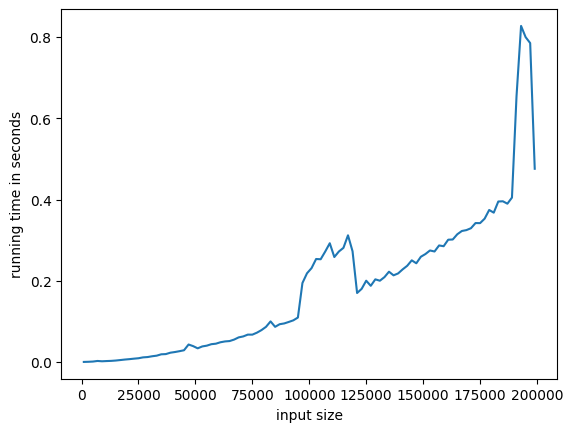

In [62]:
input_arr = [i for i in range(1000, 200_000, 2000)]

fun2 = automatic_time(input_arr, fibonacci_loop)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show() # again we can see that it looks linear but also there is some extra complexity
# from big numbers 200_000th Fibonacci is going to be quite large

In [ ]:
# 2. It is not tail recursive becuase there is something to do after returning the values (adding them together). We can use 2 accumulators to avoid this.

# Example: Binary Search

Binary search is a classic recursive algorithm to find a target value within a sorted sequence. This is among the most important of computer algorithms, and it is the reason that we so often store data in sorted order.

e.g. For the sorted sequence below stored in a Python list with indexes above:

<table>
<tr><th>0</th><th>1</th><th> 2</th><th>3</th><th>4</th><th> 5</th><th>6</th><th>7</th><th> 8</th><th>9</th><th>10</th><th> 11</th> </tr>
<tr><td>2</td><td>4</td><td> 5</td><td>6</td><td>8</td><td> 9</td><td>15</td><td>16</td><td> 17</td><td>22</td><td>30</td><td> 31</td> </tr>
</table>

If the sequence was unsorted a simple solution is a _sequential search algorithm_: use a loop to examine every element. You either reach the end of the list or find the target.

It is linear complexity, running in $\mathcal{O}(n)$ time as worst case it inspects every element in the sequence.

A sorted sequence allows a much faster approach. Think about how you would accomplish this task by hand: divide in two, and choose the middle digit as a candidate to compare to the target. Everything to the left of the candidate is lower than it and everything to the right is higher. Compare the target to the candidate and discard the left if the candidate is lower and the right if it is higher. Then repeat your _binary search_ algorithm. This is much more efficient, running in $\mathcal{O}($log$n$) time.

Review the iterative and recursive binary search algorithm implementations below.

In [63]:
def binary_search_iterative(data, target):
    """Return True if target is found in the given SORTED Python list.
    target <-> needle"""
    low = 0
    high = len(data)-1
    while low <= high: # so while array/list pointers do not meet we keep going
        mid = (low + high) // 2 # // meaning even half
        if target == data[mid]:         # found a match
            return True
        elif target < data[mid]:
            high = mid - 1                # only consider values left of mid
        else:
            low = mid + 1                 # only consider values right of mid
    return False                      # loop ended without success

In [64]:
def binary_search(data, target, low, high):
    """Return True if target is found in indicated portion of a Python list.

      The search only considers the portion from data[low] to data[high] inclusive.
      """
    if low > high:
        return False                    # interval is empty; no match
    else:
        mid = (low + high) // 2
    if target == data[mid]:         # found a match
        return True
    elif target < data[mid]:
        # recur on the portion left of the middle
        return binary_search(data, target, low, mid - 1)
    else: # target > data[mid]
        # recur on the portion right of the middle
        return binary_search(data, target, mid + 1, high)

When a function makes two recursive calls, we say that it uses binary recursion. Clearly the binary_search above is a binary recursion. Drawing the English ruler and the bad fibonacci function are also examples of binary recursion.

In [65]:
data=[2,4,5,6,8,9,15,16,17,22,30,31]
iter_ans = binary_search_iterative(data,100)
iter_ans

False

In [66]:
binary_search_iterative(data,15)

True

In [67]:
binary_search_iterative(data,7)

False

In [68]:
%%timeit
binary_search_iterative(list(range(1_000_000)), 9000)

53.4 ms ± 6.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%%timeit
binary_search_iterative(list(range(1_000_000)), 999_000)

34.9 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


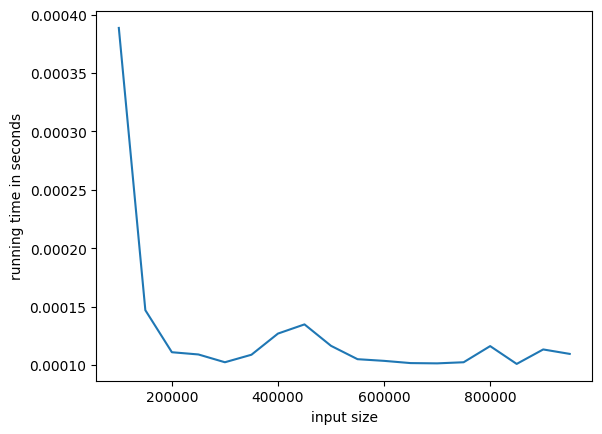

In [70]:
input_arr = [(list(range(i)), 9000) for i in range(100_000, 1_000_000, 50_000)]

fun1 = automatic_time(input_arr, binary_search_iterative)
plt.plot([len(el[0]) for el in input_arr], fun1)
# fun2 = automatic_time(input_arr, binary_search) # the recursive one
# plt.plot([len(el[0]) for el in input_arr], fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
# so binary search is in log n time we would need a trulyl large data sets to see difference
# most of our time is spent linearly setting up our data sets

In [71]:
arr = list(range(1_000_000))
big_arr = list(range(100_000_000))

In [72]:
%%timeit
binary_search(arr, 9000, 0, len(arr)-1)

2.69 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
%%timeit
binary_search_iterative(arr, 9000)

2.03 µs ± 71.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [74]:
%%timeit
binary_search(big_arr, 9000, 0, len(big_arr)-1)

4.79 µs ± 76.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [75]:
%%timeit
binary_search(big_arr, 50_000_000, 0, len(big_arr)-1) # so this should hit with 1 comparison

4.52 µs ± 79.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [76]:
%%timeit
binary_search(big_arr, 49_999_999, 0, len(big_arr)-1) # so this should hit with 1 comparison

281 ns ± 79.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [77]:
%%timeit
binary_search_iterative(big_arr, 9000)

3.74 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [78]:
%%timeit
binary_search_iterative(big_arr, 50_000_000) # so this should hit with 1 comparison

3.43 µs ± 68.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
%%timeit
binary_search_iterative(big_arr, 49_999_999) # so this should hit with 1 comparison

216 ns ± 34.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
# so creating a recursive algorithm yourself
# check if problem is already solved
# otherwise reduce problem to simpler instance of the same problem
# in other words Simplify and Delegate the problem

In [ ]:
# all recursive algorithms can be transformed to regular loop based algorithms
# worst case you build your stack for holding the function calls

## Length of an array

In [ ]:
# in case we forgout about len() function ...

In [ ]:
def array_len(x):
    if x == []:
        return 0
    else:
        return 1 + array_len(x[1:])

In [ ]:
array_len([])

0

In [ ]:
array_len([1, 2, 3])

3

In [ ]:
array_len(list(range(2961))) # so it looks like 3000 limit is actually 2961 (presumably stack needs space for other functions)

2961

## Sum of the elements in an array

In [ ]:
# in case we forgot about sum() function ...
sum([2,6,10,5])

23

In [ ]:
def array_sum(x):
    if x == []:
        return 0 # our base
    else:
        return x[0] + array_sum(x[1:]) # so we sum the first element and then recursively call on slice form 2nd element and on

In [ ]:
array_sum([])

0

In [ ]:
array_sum([5])

5

In [ ]:
array_sum([1, 2, 3, 4, 5])

15

In [ ]:
array_sum(list(range(101))) # remember the formula for summing arithmethic series n(n-1)/2

5050

In [ ]:
array_sum(list(range(2961)))

4382280

In [ ]:
first_1k = list(range(1,1001))
first_5k = list(range(1,5001))

In [ ]:
%%timeit
array_sum(first_1k)

2.54 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
array_sum(first_5k)

57.6 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def array_sum_tail_first(my_list):
    if my_list == []:
        return 0 # our base
    else:
        return my_list[-1] + array_sum_tail_first(my_list[:-1]) # so we cut our values from tail first

In [ ]:
%%timeit
array_sum_tail_first(first_1k)

1.96 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
array_sum_tail_first(first_5k)

66.9 ms ± 9.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# so in this particular case whether we start cutting our array/list from beginning or end did no make a significant difference
# there are many cases where it does make a difference

# Tower of Hanoi
![tower](https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Tower_of_Hanoi.jpeg/600px-Tower_of_Hanoi.jpeg)

* must not move more than one disc at a time
* must place this disc on a needle so that there is no smaller disc below it

* Legend say that if you have tower with 63 dics and Monks succeed in moving them all to the right side by the rules then the world would end..

In [ ]:
def recursive_hanoi(n, src, dst, tmp):
    '''
    n - how many disks to move
    src - source peg
    dst - destination peg
    tmp - temporary (middle peg in the picture above to be used for transfers)
    '''
    # base
    if n == 0:
        print("We are done")
        return
    else:
    # reduce
        recursive_hanoi(n-1, src, tmp,dst) # we move the smaller dist to tmp peg
        # TODO code to move the biggest peg to destination
        recursive_hanoi(n-1, tmp, dst,src) # move the smallest disks to destination peg

## Quicksort - more about sorting later on

In [ ]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        smaller, bigger = [], []
        for ele in array[1:]:
            if ele <= pivot:
                smaller.append(ele)
            else:
                bigger.append(ele)
        return quicksort(smaller) + [pivot] + quicksort(bigger)

In [ ]:
quicksort([])

In [ ]:
quicksort([5])

In [ ]:
quicksort([5, 4])

In [ ]:
quicksort([1, 2, 7, 5, 4])

In [ ]:
quicksort([5, 4, 3, 2])